In [1]:
import pandas as pd
import numpy as np
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import warnings
from sklearn import metrics

In [2]:
data = pd.read_csv('Pt_nanoparticle_subset.csv', index_col=0)
data.head()

,N_total,N_bulk,N_surface,R_min,R_max,R_diff,R_avg,R_std,R_skew,R_kurt,...,q6q6_T8,q6q6_T9,q6q6_T10,q6q6_T11,q6q6_T12,Surf_defects_mol,Surf_micros_mol,Surf_facets_mol,Total_E,Formation_E
ID,,,,,,,,,,,,,,,,,,,,,
1,1732,1129,603,15.1180,18.9872,3.8692,17.2471,0.6262,-0.1372,0.1226,...,64,88,52,43,40,0.0000,121.5956,267.1222,-9237.3055,756.3345
2,1755,1150,605,15.3043,20.0506,4.7463,17.3469,0.6597,0.2938,0.3970,...,69,74,44,30,50,0.6383,117.4488,266.1747,-9335.3608,790.9892
3,4672,3456,1216,21.5357,27.5179,5.9822,24.5075,0.9193,-0.0729,0.1330,...,261,258,243,182,696,0.4796,84.8806,205.7275,-25287.5650,1669.8750
4,6823,5122,1701,23.3351,35.9820,12.6469,28.0471,1.9581,0.4768,0.2181,...,417,488,419,400,1730,0.6567,87.3462,189.9616,-37049.1710,2319.5390
5,10733,8349,2384,25.7149,40.8339,15.1190,32.7271,2.1220,-0.3342,0.2877,...,683,782,685,713,4006,0.6262,83.9156,163.6563,-58602.2500,3327.1600


In [3]:
X = data.iloc[:,0:10]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

In [37]:
# Create a Random Forest Regressor
rf_reg = RandomForestRegressor()
hps = dict(n_estimators=[50,100,150,200,250],min_samples_split=[2,3,4],min_samples_leaf=[1,2,3],max_features=["auto","sqrt","log2"])
reg = GridSearchCV(rf_reg, hps)
# Train the model using the training sets 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

# Model Evaluation
print(reg.best_params_)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R^2: 0.9991694612988002
Adjusted R^2: 0.9991613899800325
MAE: 20.65774147576928
MSE: 1283.6849738581473
RMSE: 35.82854970352759
R^2: 0.9938643357987528
Adjusted R^2: 0.9936179235818352
MAE: 54.18522753615388
MSE: 9202.221814588936
RMSE: 95.92821177624931


In [30]:
# Create a Random Forest Regressor
rf_reg = RandomForestRegressor()
hps = dict(n_estimators=[50,100,150,200,250],min_samples_split=[2,3,4],min_samples_leaf=[1,2,3],max_features=["auto","sqrt","log2"])
reg = RandomizedSearchCV(rf_reg, hps, random_state=0, n_iter=50)
# Train the model using the training sets 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

# Model Evaluation
print(reg.best_params_)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

{'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}
R^2: 0.9988271456145913
Adjusted R^2: 0.9988157476127895
MAE: 24.47990566208272
MSE: 1812.7698912740016
RMSE: 42.576635509091155
R^2: 0.9940987367563312
Adjusted R^2: 0.9938617382324891
MAE: 54.00463473047944
MSE: 8850.669067495832
RMSE: 94.07799459754567


In [23]:
from sklearn.model_selection import SequenceSearchCV
# Create a Random Forest Regressor
rf_reg = RandomForestRegressor()
hps = dict(n_estimators=[50,100,150,200,250],min_samples_split=[2,3,4],min_samples_leaf=[1,2,3],max_features=["auto","sqrt","log2"])
reg = SequenceSearchCV(rf_reg, hps, random_state=0, n_iter=10)
# Train the model using the training sets 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

# Model Evaluation
print(reg.best_params_)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

{'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}
R^2: 0.9987310632816128
Adjusted R^2: 0.9987187315350784
MAE: 25.32487802924789
MSE: 1961.275249205677
RMSE: 44.286287372116405
R^2: 0.9937384289518038
Adjusted R^2: 0.9934869602350087
MAE: 53.996223876717465
MSE: 9391.055931906647
RMSE: 96.9074606617398


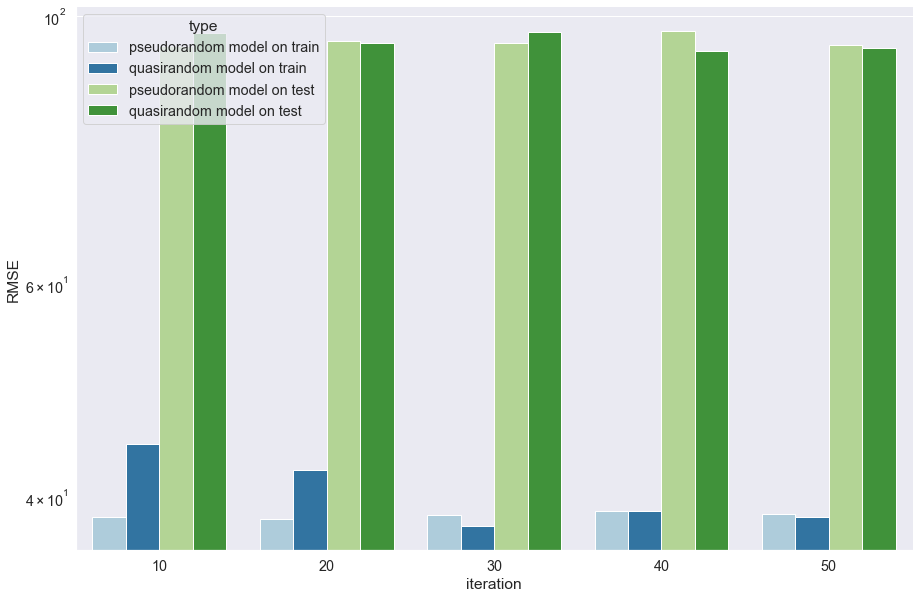

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame({
    'iteration': ['10','20','30','40','50'],
    'pseudorandom model on train': [38.5258,38.3956,38.7123,38.9471,38.7441],
    'quasirandom model on train': [44.2863,42.1470,37.9045,38.9520,38.5408],
    'pseudorandom model on test': [94.5007,95.4135,95.0440,97.1559,94.7513],
    'quasirandom model on test': [96.9075,94.9600,97.0977,93.6479,94.1243]
})
fig, ax1 = plt.subplots(figsize=(15, 10))
tidy = df.melt(id_vars='iteration').rename(columns=str.title)
tidy.columns = ['iteration', 'type', 'RMSE']
sns.set(rc = {'figure.figsize':(15,10)})
sns.set(font_scale = 1.3)
ax1.set_yscale("log")
sns.set_palette(sns.color_palette("Paired"))
sns.barplot(x='iteration', y='RMSE', hue='type', data=tidy, ax=ax1)
sns.despine(fig)
plt.savefig('hp_opt_all_list.png',bbox_inches='tight')